In [1684]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [1685]:
# load package for loading data
import pandas as pd

In [1686]:
housing_dataset = 'boston_housing.csv'
housing_dataset = pd.read_csv(housing_dataset)
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [1687]:
#Check null-value
housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [1688]:
X = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [1689]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [1690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

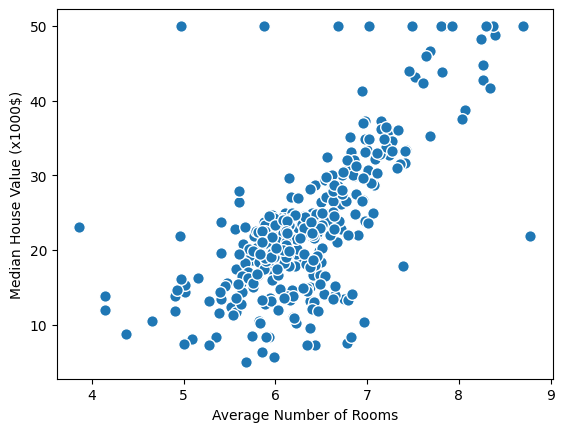

In [1691]:
# visualize data
#import library
import matplotlib.pyplot as plt
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [1692]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]
    
    def fit(self, X, y):
        pass

### Gradient Descent

In [1693]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.001, max_iter=200, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.costs = []
        
        for iter_i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred

            self.w[0] += self.eta*np.sum(diff)
            self.w[1:] += self.eta*np.dot(X.T, diff)
            J = 1/2 * np.sum(diff**2)
            self.costs.append(J)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

<span style="font-size: larger;"> **Giá trị phù hợp nhất của 'learning rate' là 1e-4, vì:**</span>

- eta hay 'learning rate' là một trong những hyperparameters của thuật toán Linear Regression, vì vậy nó rất quan trọng vì ảnh hưởng trực tiếp tới độ chính xác của model. Trong model, eta thường là số rất nhỏ vì nếu quá lớn mô hình sẽ không hội tụ và đi về điểm tối ưu, còn quá nhỏ thì sẽ tốn chi phí chạy nhiều bước iterations.
- eta = 1e-2 hoặc 1e-3 đều là những learning rate lớn khiến model bị Gradient Exploding, Oscillations, Non-convergence, Divergence hoặc NaN values.
- Khi thay eta 1e-2, 1e-3 khiến giá trị cost tăng cao đột ngột ở một số khoảng epochs, những khoảng còn lại gần như bằng không. Đây là điều bất thường chứng tỏ có lỗi trong quá trình huấn luyện. Còn eta = 1e-4 thì đồ thị giảm đều chứng tỏ mô hình hoạt động tốt.


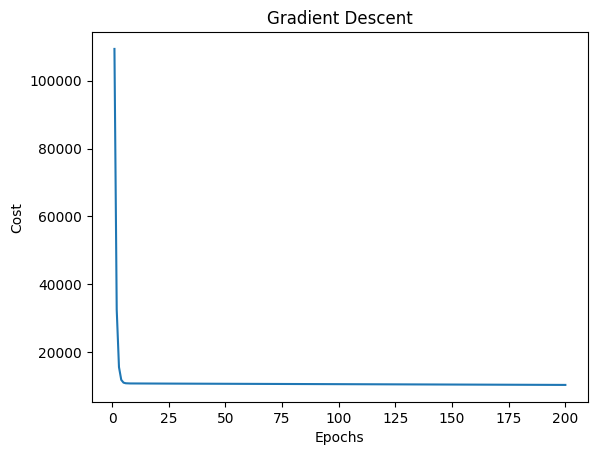

In [1694]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train,y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

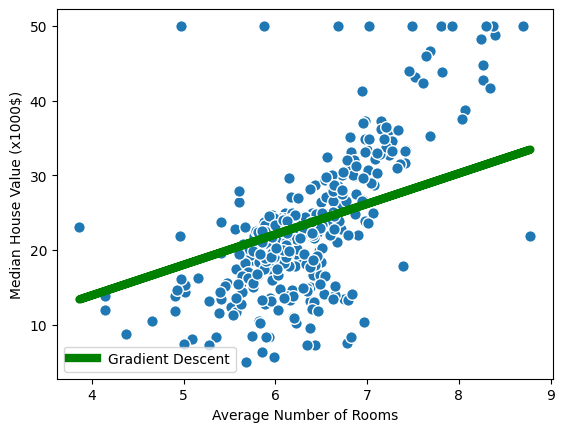

In [1695]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [1696]:
class SGD(LinearRegression):
    def __init__(self, eta=0.01, max_iter=1000, batch_size=32, tol=1e-3, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.tol = tol
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        for epoch in range(self.max_iter):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X.iloc[indices].reset_index(drop=True)
            y = y.iloc[indices].reset_index(drop=True)

            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X.iloc[i:i + self.batch_size]
                y_batch = y.iloc[i:i + self.batch_size]

                y_pred = self.predict(X_batch)
                diff = y_batch - y_pred

                grad_w = -2 * np.dot(X_batch.T, diff) / X_batch.shape[0]
                grad_b = -2 * np.sum(diff) / X_batch.shape[0]

                self.w[1:] -= self.eta * grad_w
                self.w[0] -= self.eta * grad_b

            # Kiểm tra điều kiện dừng sớm
            if np.linalg.norm(grad_w) < self.tol and np.abs(grad_b) < self.tol:
                print(f"Converged at epoch {epoch}")
                break


- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [1697]:
# Initialize the model
reg_SGD = SGD(eta=1e-4, max_iter=200,random_state=42)

# Train model
reg_SGD.fit(X_train,y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

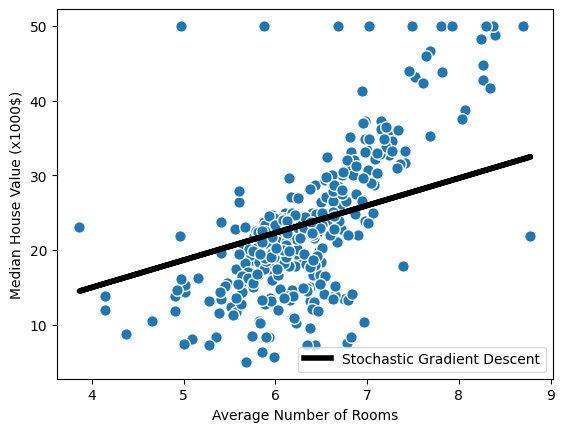

In [1698]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [1699]:
from sklearn.linear_model import LinearRegression

In [1700]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

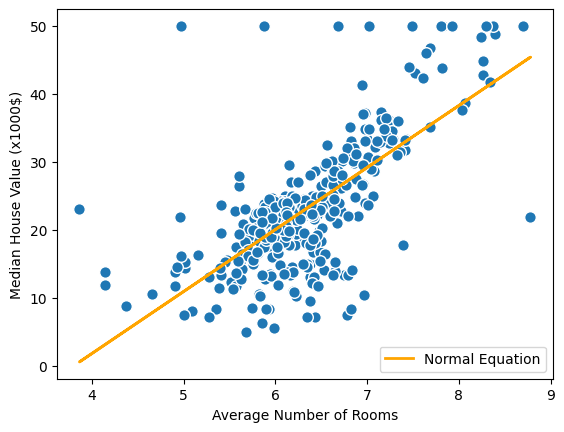

In [1701]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

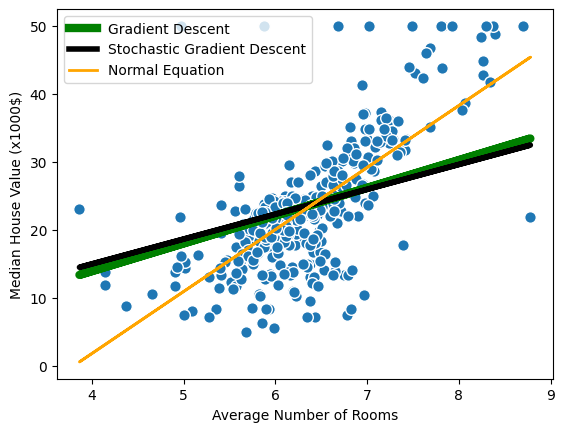

In [1702]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [1703]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[0.35840934 3.65675288]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [1704]:
y_pred_GD = reg_GD.predict(X_test)

In [1705]:
y_pred_SGD = reg_SGD.predict(X_test)

In [1706]:
y_pred_NE = reg_NE.predict(X_test)

In [1707]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [1708]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.423535
MAE of NE: 4.314224


In [1709]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.760089
MSE of NE: 40.35145


In [1710]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.265094
R2 of NE: 0.458465


## Experiment with Standardized Data

In [1711]:
# Re-load the dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [1712]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [1713]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [1714]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [1715]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

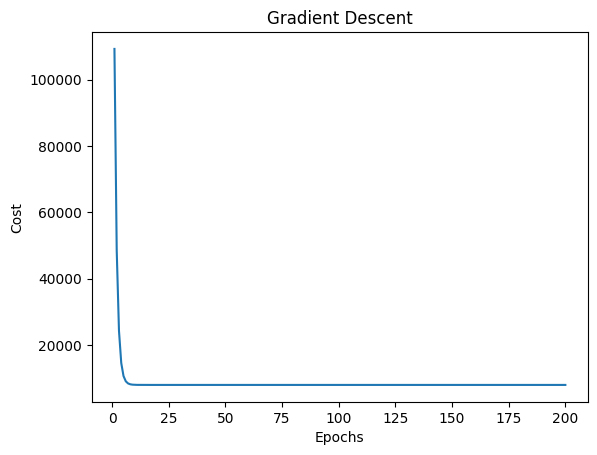

In [1716]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



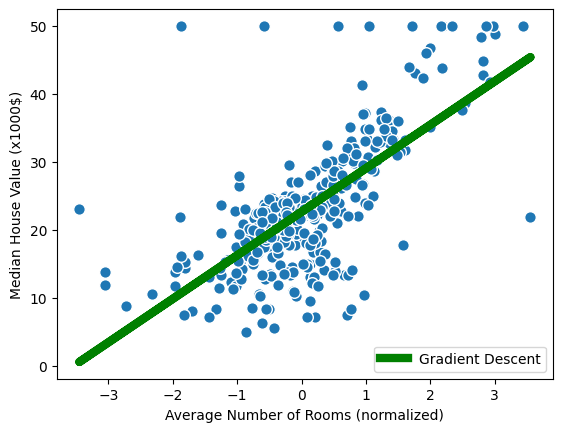

In [1717]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [1718]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGD(eta=1e-3, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


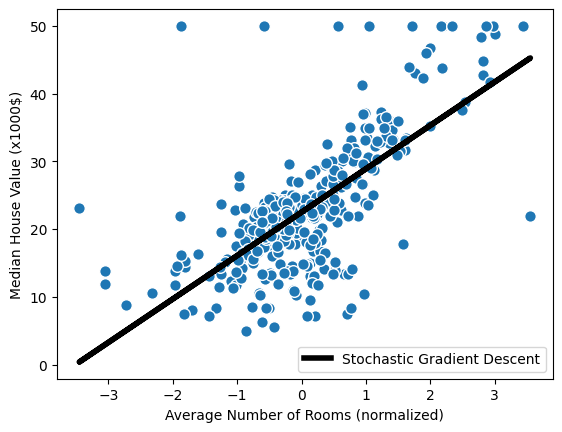

In [1719]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [1720]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

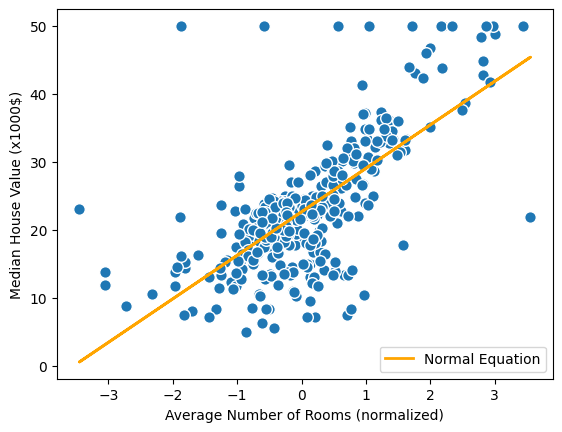

In [1721]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

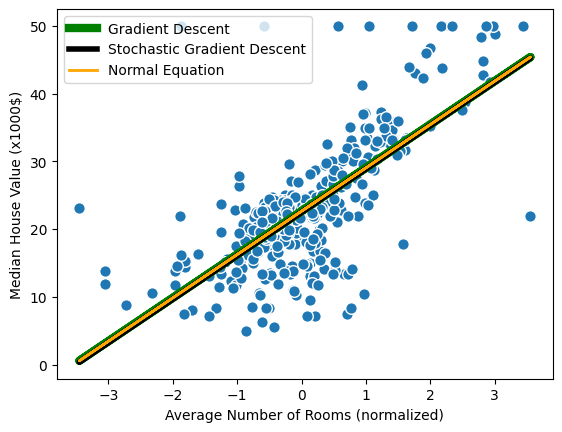

In [1722]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [1723]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [1724]:
w_SGD = reg_SGD.w
w_SGD

array([22.48791494,  6.40776756])

In [1725]:
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
w_NE

array([22.64163118,  6.40020122])

In [1726]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [1727]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [1728]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [1729]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.304823
MAE of NE: 4.314224


In [1730]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.264637
MSE of NE: 40.35145


In [1731]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.45963
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [1732]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [1733]:
X = housing_dataset.drop(columns='MEDV',axis=1)
y = housing_dataset['MEDV']

In [1734]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

**Giá trị phù hợp là 1e-8 vì khi eta=1e-8 giá trị cost giảm dần đều, đây là dấu hiệu mô hình đang học tốt. Còn các giá trị eta khác quá cao khiến cho model bị Gradient Exploding, Oscillations, Non-convergence, Divergence hoặc NaN values.**

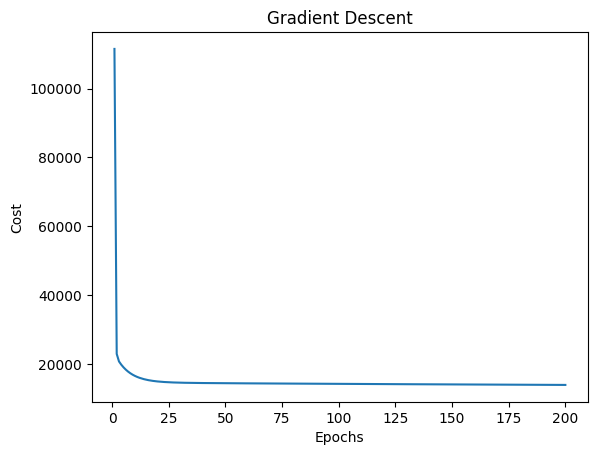

In [1735]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

**Khi giải quyết bài toán multi linear regression, em nhận thấy model em tự cài đặt không còn được đánh giá tốt nên em sẽ sử dụng package của sklearn**

In [1736]:
from sklearn.linear_model import SGDRegressor
# Initialize the SGD model
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

### Normal Equation

In [1737]:
# Add the '1' column to data
X_train_NE = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

In [1738]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_NE, y_train)

LinearRegression()

### Algorithms Comparisons

In [1739]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [1740]:
w_SGD = np.hstack([reg_SGD.intercept_, reg_SGD.coef_])
w_SGD

array([-2.44296481e+10, -1.95396370e+11,  4.08295818e+11, -2.86228380e+10,
       -2.45052946e+10, -5.51741048e+09, -1.86074073e+11, -2.26531137e+11,
       -4.83164203e+11,  4.58609280e+11,  4.12399638e+11, -2.33768015e+11,
       -2.82469328e+11,  3.66111352e+11])

In [1741]:
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
w_NE

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

In [1742]:
y_pred_GD = reg_GD.predict(X_test)

In [1743]:
y_pred_SGD = reg_SGD.predict(X_test)

In [1744]:
y_pred_NE = reg_NE.predict(np.hstack([np.ones((X_test.shape[0], 1)), X_test]))

In [1745]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 71601284959196.69
MAE of NE: 3.16271


In [1746]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 1.1319731421309066e+28
MSE of NE: 21.517444


In [1747]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: -1.5191599993317923e+26
R2 of NE: 0.711226


## Experiment with Standardized Data

In [1748]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [1749]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [1750]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [1751]:
X_new = housing_dataset.drop(columns='MEDV',axis=1)
y = housing_dataset['MEDV']

In [1752]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

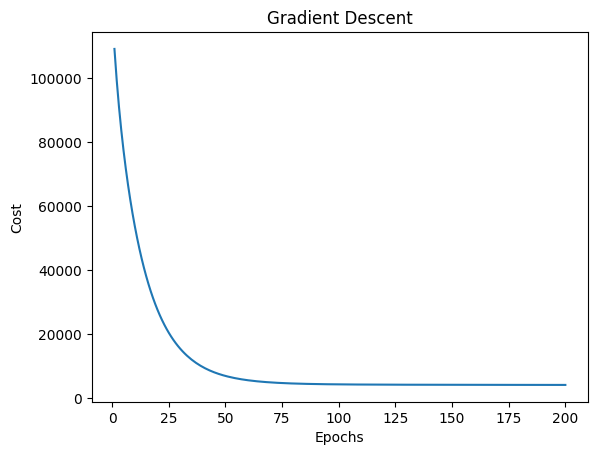

In [1753]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [1754]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

c:\Users\hieut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [1755]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [1756]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [1757]:
w_SGD = np.hstack([reg_SGD.intercept_, reg_SGD.coef_])
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [1758]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [1759]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [1760]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [1761]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [1762]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [1763]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [1764]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

**Định nghĩa**: Hệ số $R^2$ còn gọi là hệ số xác định, là một chỉ số thống kê thể hiện mức độ phù hợp của mô hình hồi quy với dữ liệu. Nó biểu thị tỷ lệ phần trăm biến thiên của biến phụ thuộc được giải thích bởi các biến độc lập trong mô hình. <br>
<br>
**Công thức tính:**
$ 
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} 
$ <br>
*Trong đó:* 
- $RSS=\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ là Tổng bình phương các phần dư (Residual Sum of Squares), đo lường tổng các khoảng cách bình phương giữa các giá trị thực tế và các giá trị dự đoán từ mô hình.
- $TTS=\sum_{i=1}^{n} (y_i - \bar{y})^2$ là Tổng bình phương các sai số tổng cộng (Total Sum of Squares), đo lường tổng các khoảng cách bình phương giữa các giá trị thực tế và giá trị trung bình của dữ liệu.<br>

**Ý nghĩa:** Chỉ số này đo lường tỷ lệ biến thiên của dữ liệu mà mô hình có thể giải thích được, với giá trị từ 0 đến 1, trong đó 1 biểu thị rằng mô hình hoàn toàn phù hợp với dữ liệu và 0 biểu thị không có độ phù hợp.
- $ R^2 = 1 $: Mô hình khớp hoàn toàn với dữ liệu.
- $ R^2 = 0 $: Mô hình không giải thích được bất kỳ biến động nào trong dữ liệu.
- $ R^2 \in (0, 1) $: Mô hình có một mức độ khớp nhất định, nhưng không hoàn hảo.
- $R^2 <0 $: Mô hình kém hiệu quả, có thể là do sai mô hình, dữ liệu có vấn đề, tính toán không chính xác hoặc Overfitting. Cần cải thiện mô hình.<br>

**Ví dụ:**
Giả sử chúng ta muốn dự đoán số điểm kiểm tra của sinh viên dựa trên số giờ học:
- Nếu $𝑅^2=0.9$, có nghĩa là 90% biến động trong điểm số kiểm tra được giải thích bởi mô hình của chúng ta. Như vậy, mô hình dự đoán là tương đối chính xác, và số giờ học là yếu tố quan trọng ảnh hưởng đến điểm số.
- Nếu $R^2=0.3$, chỉ 30% biến động trong điểm số kiểm tra được giải thích bởi mô hình. Điều này có thể ngụ ý rằng ngoài giờ học, có các yếu tố khác quan trọng hơn (như phương pháp học, thể trạng tinh thần) mà mô hình chưa nắm bắt được.<br>

**Một số lưu ý khi sử dụng $R^2$:**
- Không phản ánh chất lượng dự đoán ở mọi trường hợp: $𝑅^2$ cao không luôn đảm bảo mô hình tốt vì có thể do "quá khớp" (overfitting) với dữ liệu nhiễu.

- Không phù hợp cho tất cả loại mô hình: $𝑅^2$ thường chỉ áp dụng cho hồi quy tuyến tính, trong khi các mô hình khác có thể cần các chỉ số khác, như AUC-ROC cho phân loại.

- Không so sánh giữa các tập dữ liệu khác nhau: $𝑅^2$ chỉ nên so sánh giữa các mô hình dự đoán trên cùng một tập dữ liệu.

- Có thể bị ảnh hưởng bởi số biến đầu vào: Khi có nhiều biến, $𝑅^2$ có thể tăng do số biến lớn, không nhất thiết là mô hình tốt hơn. Khi đó, dùng $𝑅^2$ điều chỉnh sẽ phù hợp hơn.